In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df=pd.read_csv("marketing_sales_data.csv")
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


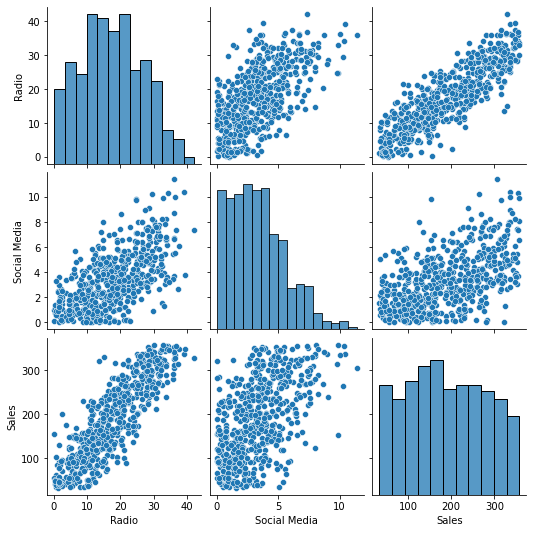

In [3]:
###*****Step 2: Data exploration*******
sns.pairplot(df);

In [4]:
#Radio and Social Media both appear to have linear relationships with Sales. 
#Given this, Radio and Social Media may be useful as independent variables in a multiple linear regression model estimating Sales.

#TV and Influencer are excluded from the pairplot because they are not numeric.
print(df.groupby('TV')['Sales'].mean())
print(df.groupby('Influencer')['Sales'].mean())

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64
Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64


In [5]:
#The average Sales for High TV promotions is considerably higher than for Medium and Low TV promotions. 
#TV may be a strong predictor of Sales.

#The categories for Influencer have different average Sales, but the variation is not substantial.
#Influencer may be a weak predictor of Sales.

#These results can be investigated further when fitting the multiple linear regression model.

###****Remove missing data*****
df=df.dropna(axis=0)
df

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377
...,...,...,...,...,...
567,Medium,14.656633,3.817980,Micro,191.521266
568,High,28.110171,7.358169,Mega,297.626731
569,Medium,11.401084,5.818697,Nano,145.416851
570,Medium,21.119991,5.703028,Macro,209.326830


In [6]:
##*****Clean column names****
#The ols() function doesn't run when variable names contain a space
df=df.rename(columns={'Social Media':'Social_media'})


In [7]:
##Step 3: Model building
ols_formula='Sales~C(TV) + Radio'
OLS=ols(formula=ols_formula,data=df)
model=OLS.fit()
model_result=model.summary()
model_result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          1.63e-288
Time:                        23:05:51   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#TV was selected, as the preceding analysis showed a strong relationship between the TV promotional budget and the average Sales.
#Radio was selected because the pairplot showed a strong linear relationship between Radio and Sales.
#Social Media was not selected because it did not increase model performance and it was later determined to be correlated with another independent variable: Radio.
#Influencer was not selected because it did not show a strong relationship to Sales in the preceding analysis.

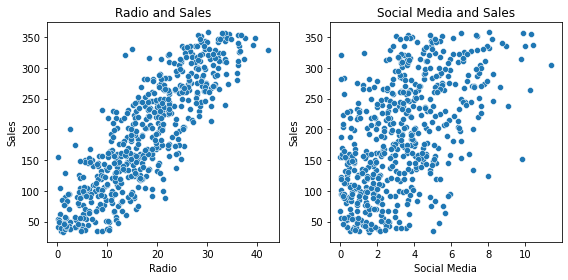

In [9]:
#Check model assumptions
#Model assumption: Linearity
#Create scatterplots comparing the continuous independent variable(s) selected previously with Sales to check the linearity assumption
fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.scatterplot(x = df['Radio'], y = df['Sales'],ax=axes[0])

axes[0].set_title("Radio and Sales")

sns.scatterplot(x = df['Social_media'], y = df['Sales'],ax=axes[1])

axes[1].set_title("Social Media and Sales")

axes[1].set_xlabel("Social Media")

plt.tight_layout()

In [10]:
#The linearity assumption holds for Radio,
#as there is a clear linear relationship in the scatterplot between Radio and Sales. 
#Social Media was not included in the preceding multiple linear regression model,
#but it does appear to have a linear relationship with Sales.

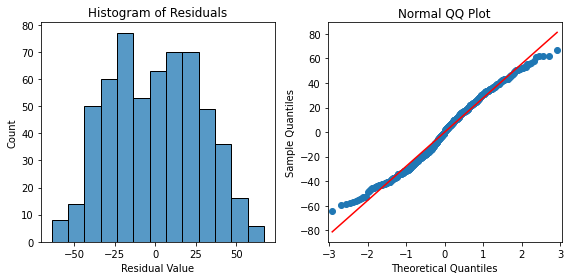

In [11]:
#Model assumption: Independence
#Model assumption: Normality
residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize = (8,4))


sns.histplot(residuals, ax=axes[0])

axes[0].set_xlabel("Residual Value")

axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

axes[1].set_title("Normal QQ Plot")

plt.tight_layout()



In [12]:
#The histogram of the residuals are approximately normally distributed, 
#which supports that the normality assumption is met for this model. 
#The residuals in the Q-Q plot form a straight line, further supporting that this assumption is met.

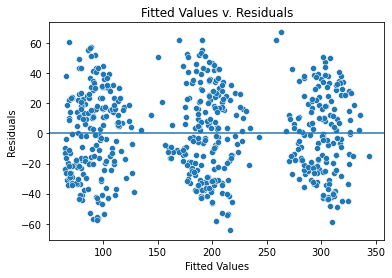

In [13]:
#Check that the constant variance assumption is not violated by creating a scatterplot with the fitted values and residuals. 
#Add a line at  𝑦=0 to visualize the variance of residuals above and below  𝑦=0
fig= sns.scatterplot(x=model.fittedvalues, y=model.resid)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)
plt.show()

In [14]:
##The fitted values are in three groups because the categorical variable is dominating in this model, meaning that TV is the biggest factor that decides the sales.

#However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.

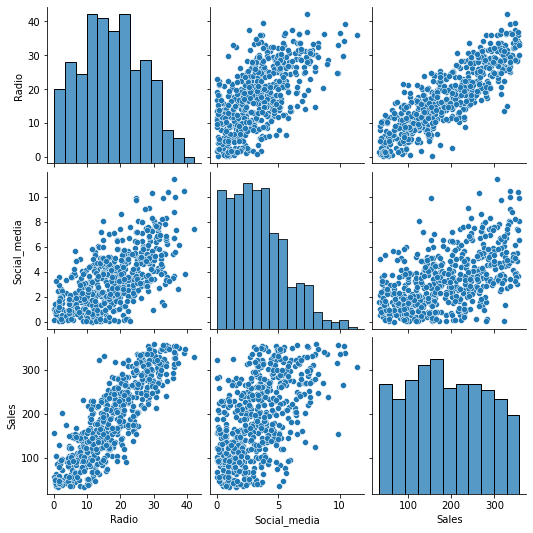

In [15]:
### Model assumption: No multicollinearity
sns.pairplot(df)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X= df[['Radio','Social_media']]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

[5.170921621625241, 5.170921621625241]

In [22]:
##Radio and Social_Media are included in the model is 5.17 for each variable, indicating high multicollinearity.

In [26]:
#Step 4: Results and evaluation
model_result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          1.63e-288
Time:                        23:05:51   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#When TV and Radio are used to predict Sales, the model coefficients are:

# 𝛽0=218.5261
 
# 𝛽𝑇𝑉𝐿𝑜𝑤=−154.2971
 
# 𝛽𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚=−75.3120
 
# 𝛽𝑅𝑎𝑑𝑖𝑜=2.9669

# TV and Radio as the independent variables results in a multiple linear regression model with  𝑅2=0.904
# In other words, the model explains  90.4% of the variation in Sales.
# This makes the model an excellent predictor of Sales.

#High TV promotional budgets have a substantial positive influence on sales. 
#The model estimates that switching from a high to medium TV promotional budget reduces sales by $\$75.3120$ million (95% CI $[-82.431,-68.193])$, 
#switching from a high to low TV promotional budget reduces sales by $\$154.297$ million (95% CI $[-163.979,-144.616])$. 
#The model also estimates that an increase of $\$1$ million in the radio promotional budget will yield a $\$2.9669$ million increase in sales (95% CI $[2.551,3.383]$).

#Thus, it is recommended that the business allot a high promotional budget to TV when possible and invest in radio promotions to increase sales. 











